In [30]:
from typing import List

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

DATA_PATH: str = "data/01-01-2021_19-05-2022.csv"

In [31]:
df = pd.read_csv(
    DATA_PATH,
)
df.date = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S")
_ = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              503 non-null    datetime64[ns]
 1   url quantity                      503 non-null    int64         
 2   rua geraldo barbosa               503 non-null    float64       
 3   avenida dos expedicionarios       503 non-null    float64       
 4   rua joao carvalho                 503 non-null    float64       
 5   avenida conselheiro lafaiete      503 non-null    float64       
 6   tunel da avenida rogaciano leite  503 non-null    float64       
 7   avenida washington soares         503 non-null    float64       
 8   avenida alberto sa                503 non-null    float64       
 9   avenida heraclito graca           503 non-null    float64       
 10  avenida jose bastos               503 non-null    

In [32]:
df.sum(axis=0, numeric_only=True).sort_values(ascending=False)

url quantity                        1235.0
avenida heraclito graca               39.0
avenida alberto sa                    32.0
avenida jose bastos                   19.0
avenida washington soares             12.0
avenida dos expedicionarios            5.0
avenida desembargador moreira          3.0
rua geraldo barbosa                    2.0
rua joao carvalho                      1.0
avenida conselheiro lafaiete           1.0
tunel da avenida rogaciano leite       1.0
dtype: float64

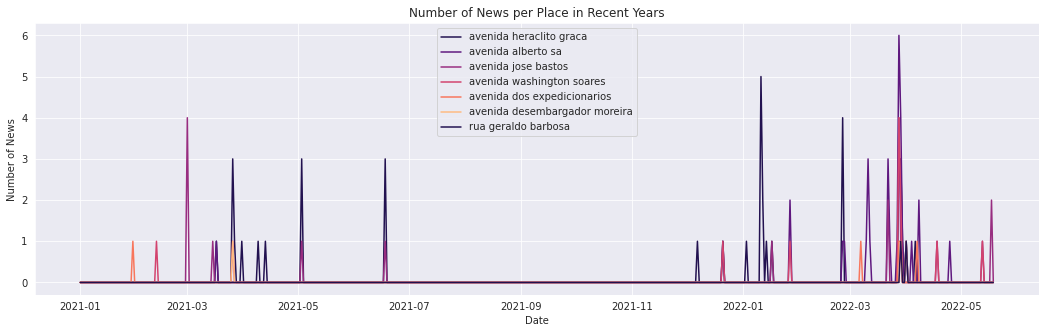

In [35]:
most_freq_places: List[str] = df.drop("url quantity", axis=1).sum(axis=0, numeric_only=True).sort_values(ascending=False).index # type: ignore

sns.set_palette("magma")

plt.figure(figsize=(18,5))
plt.title("Number of Waterlogging News per Place in Recent Years")

n_places = 7
for i in range(n_places):
    p = sns.lineplot(data=df, x="date", y=most_freq_places[i])
p.set(ylabel="Number of News", xlabel="Date") # type: ignore

_ = plt.legend(labels=most_freq_places[:n_places])

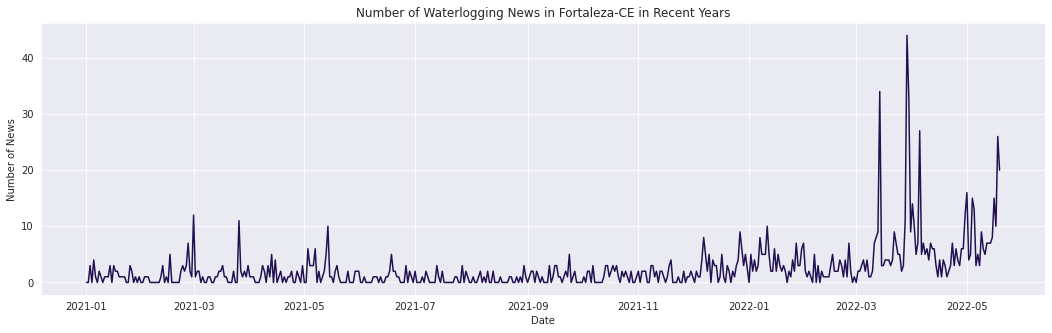

In [39]:
plt.figure(figsize=(18,5))
plt.title("Number of Waterlogging News in Fortaleza-CE in Recent Years")

p = sns.lineplot(data=df, x="date", y="url quantity", palette="Blues")
_ = p.set(ylabel="Number of News", xlabel="Date")

In [1]:
# import helpers

# helpers.join_csvs(
#     file_paths=[
#         "data/01-01-2021_28-02-2021_1653098708.765253.csv",
#         "data/01-03-2021_24-05-2021_1653133800.101376.csv",
#         "data/25-05-2021_03-10-2021_1653139342.037623.csv",
#         "data/04-10-2021_30-12-2021_1653170446.912782.csv",
#         "data/01-01-2022_19-05-2022.csv",
#     ],
#     output_path="data/test.csv"
# )